<a href="https://colab.research.google.com/github/dani-lbnl/mudit/blob/main/Topic_Modeling_Top2Vec_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages Installation

In [1]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

     |████████████████████████████████| 34.5 MB 10 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.51.2 requires llvmlite<0.35,>=0.34.0.dev0, but you have llvmlite 0.38.0 which is incompatible.
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-ocmvejwr/hdbscan_1528f70b2a4b49b18012dea35f0dfde4
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-ocmvejwr/hdbscan_1528f70b2a4b49b18012dea35f0dfde4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330866 

In [5]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

### Preparing dataframe

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
df = pd.read_table('/content/drive/MyDrive/LBNL/Pubs.xls')
abstracts = list(df[~df['Abstract'].isna()]['Abstract'])

In [8]:
# for title
indices = df['Title'].isna()
df.loc[indices,'Title'] = ""

# for abstract
indices = df['Abstract'].isna()
df.loc[indices,'Abstract'] = ""

# combined - title + abstract
df['Combined'] = df['Title'] + " " + df['Abstract']
combined = list(df['Combined'])

In [9]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
  

new_df= []
for doc in combined:
  filt_combined = []
  for word in word_tokenize(doc):
    # print(word)
    if word not in stopwords.words('english'):
      # print(word)
      filt_combined.append(word)
  new_df.append(" ".join(filt_combined))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
new_df

['Insights in-situ x-ray computed tomography axial impregnation unidirectional fiber beds',
 'Effect aging toughness human cortical bone : Evaluation R-curves Age-related deterioration fracture properties bone , coupled increased life expectancy , responsible increasing incidence bone fracture elderly , hence , understanding fracture properties degrade age essential . The present study describes ex vivo fracture experiments quantitatively assess effect aging fracture toughness properties human cortical bone longitudinal direction . Because cortical bone exhibits rising crack-growth resistance crack extension , unlike previous studies , toughness evaluated terms resistance-curve ( R-curve ) behavior , measured bone taken wide range age groups ( 34-99 years ) . Using approach , ex vivo crack-initiation crack-growth toughness determined found deteriorate age ; initiation toughness decreases 40 % 6 decades 40 100 years , growth toughness effectively eliminated age range . The reduction cra

### Top2Vec on pubs.xlsx

#### on combined (stop words not removed)

In [8]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=combined, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-04-01 19:01:43,250 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-04-01 19:01:43,530 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-04-01 19:02:09,057 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-04-01 19:02:12,198 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

Total time taken (mins):  0


In [9]:
# show the total number of topics
model_reviews.get_num_topics() 

3

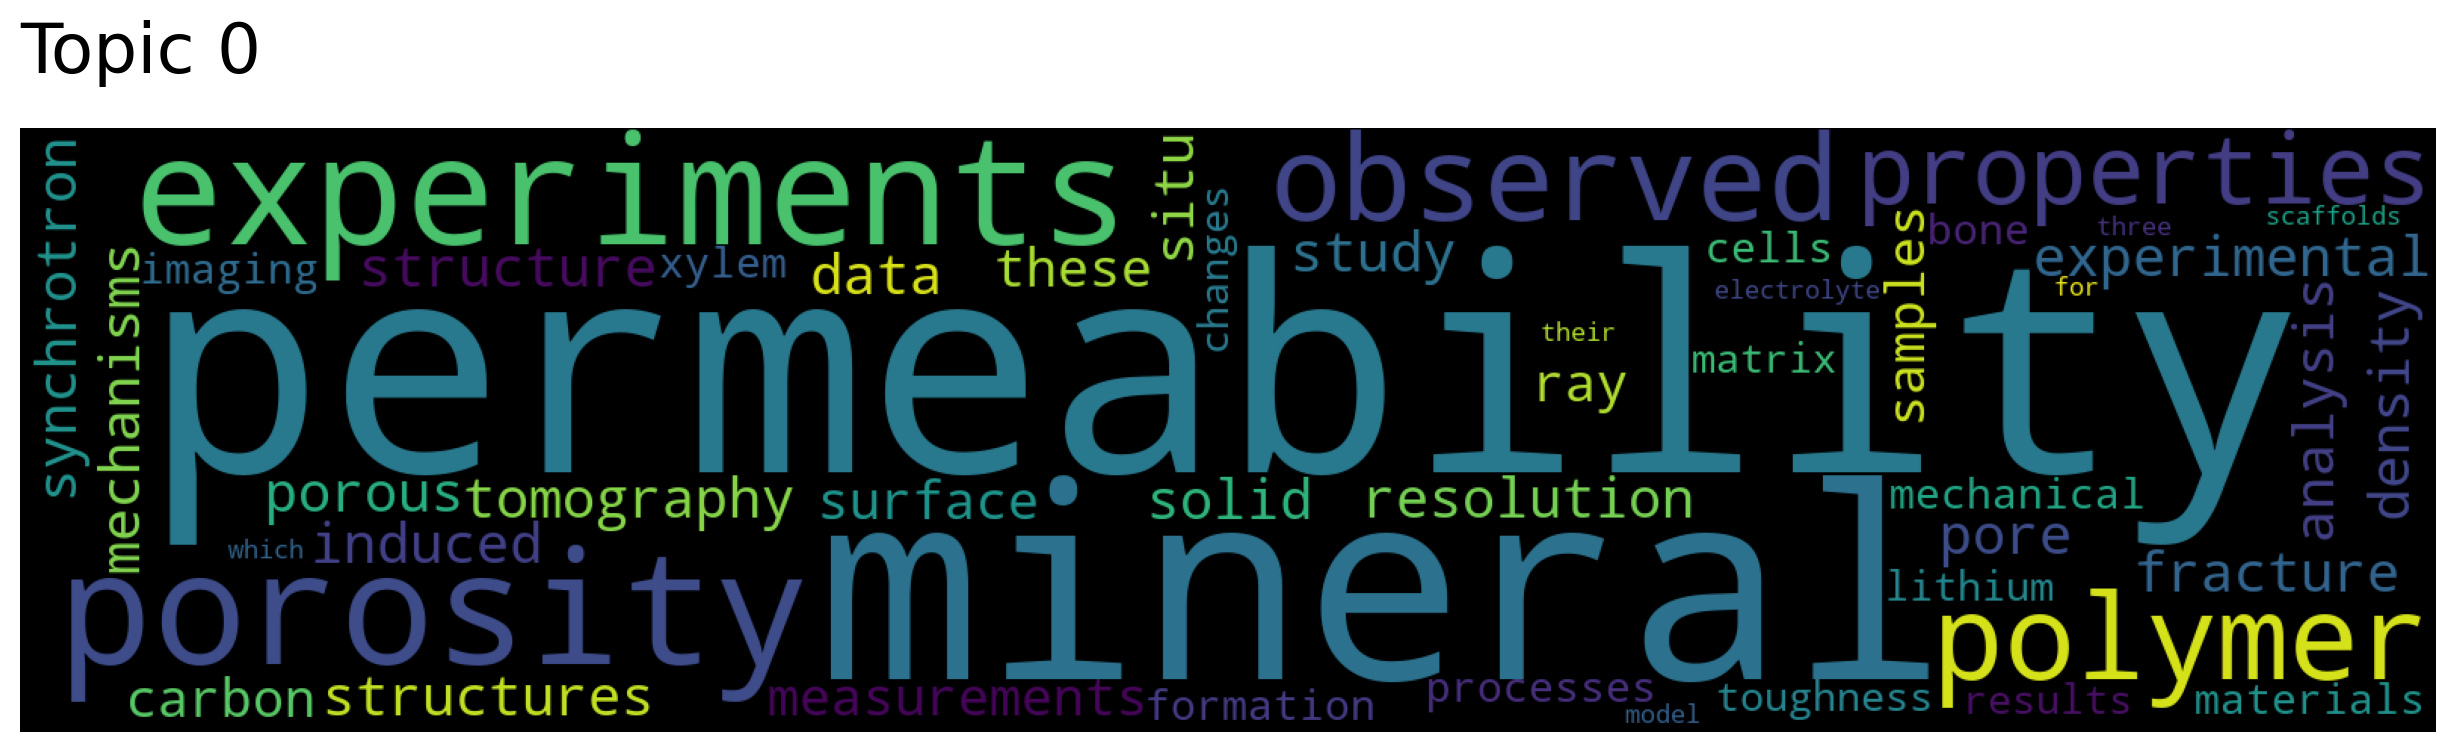

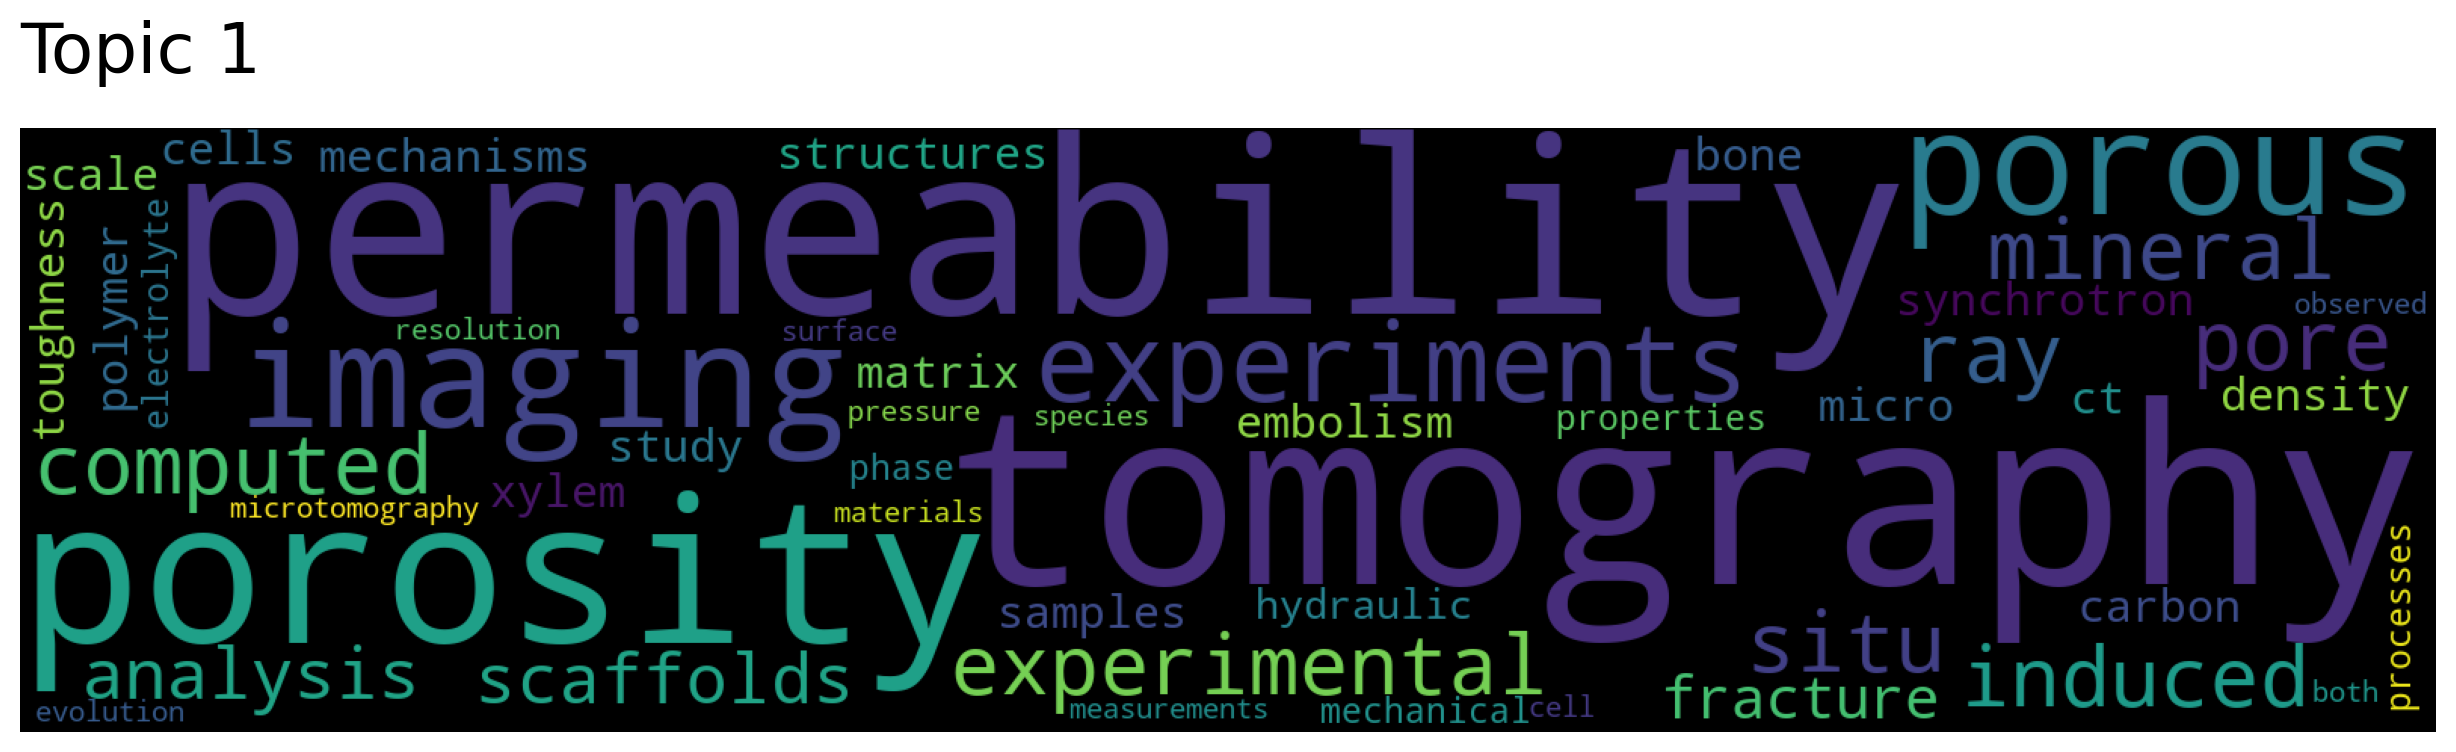

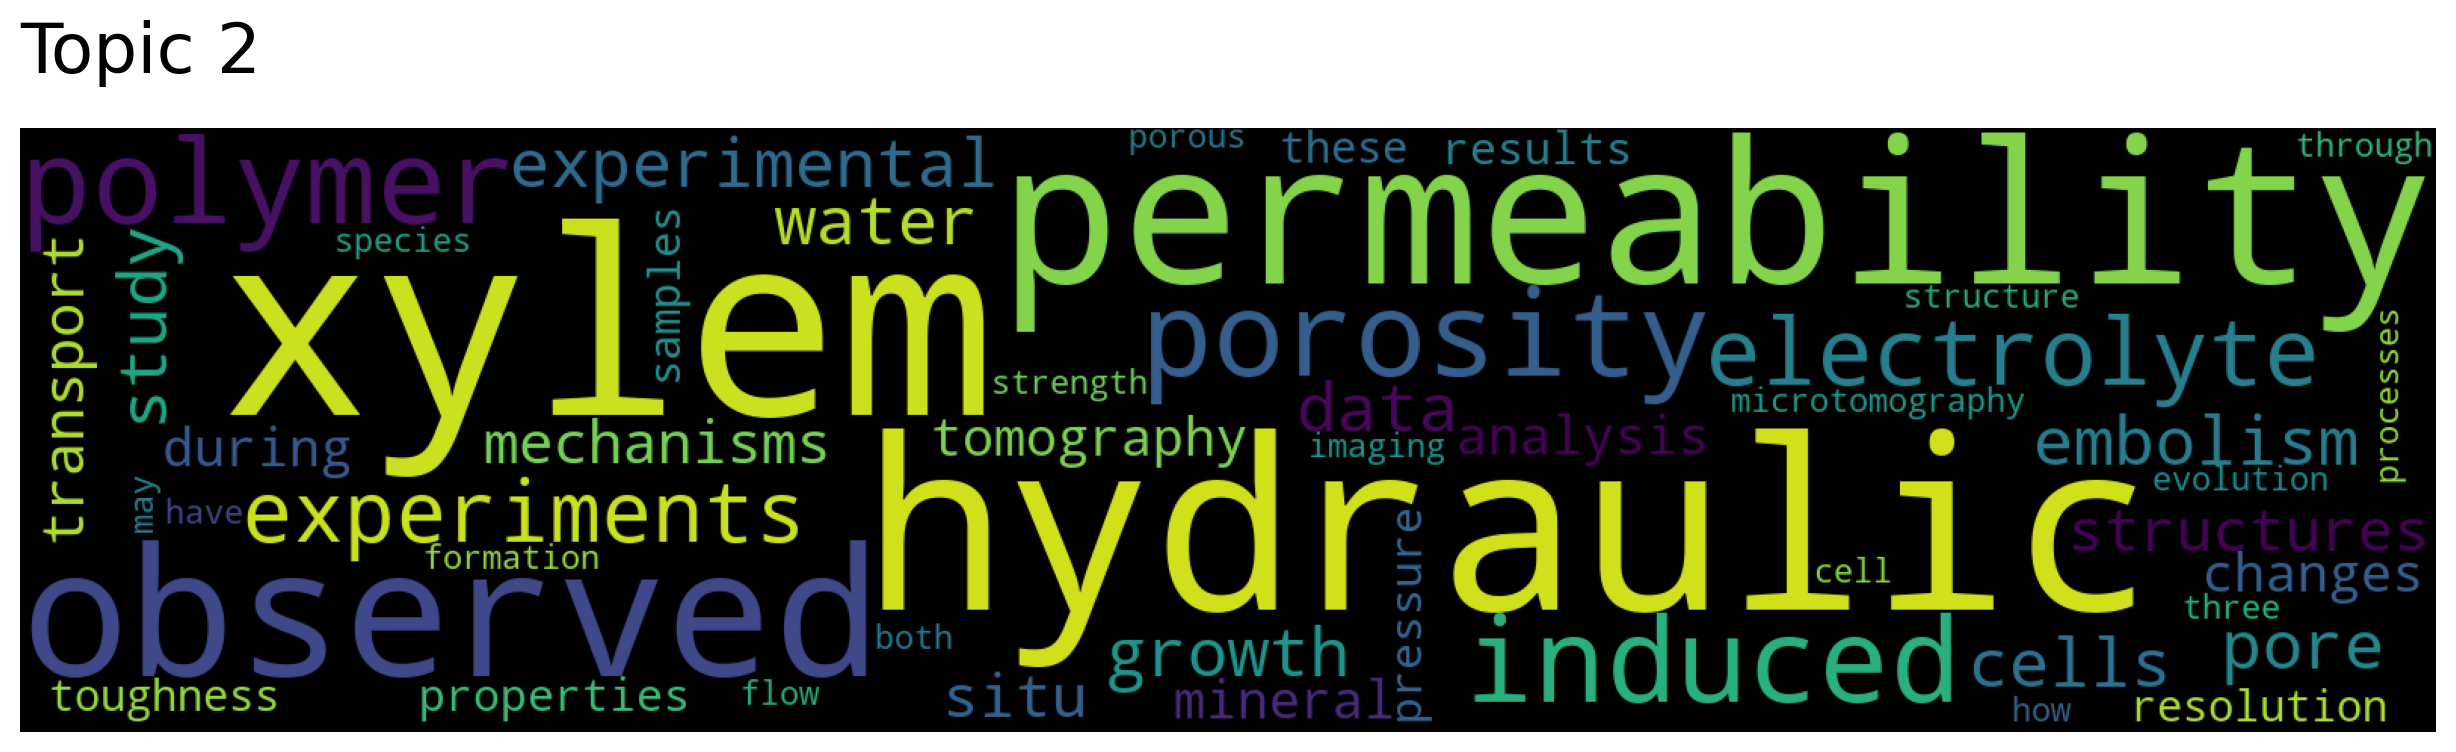

In [10]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:7]:
    model_reviews.generate_topic_wordcloud(topic)

In [11]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.6883310675621033
-----------
Pore-scale multiphase flow modeling and imaging of CO[d2] exsolution in Sandstone 
-----------

Document: 238, Score: 0.6702237129211426
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 275, Score: 0.6637859344482422
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------

Document: 370, Score: 0.6627615690231323
-----------
Pore-scale and topology analysis of flame stabilization inside inert porous media using X-ray microtomography 
-----------

Document: 302, Score: 0.6615996360778809
-----------
Micro-Scale Analysis of Liquid Water Breakthrough inside Gas Diffusion Layer for PEMFC Using X-ray Computed Tomography and Lattice Boltzmann Method 
-----------



In [12]:
words, word_scores = model_reviews.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621288647671
embolism 0.4667333559005267
ct 0.43697211709808015
synchrotron 0.4169693143002183
microtomography 0.4099750027971195
induced 0.40701209028497626
scaffolds 0.3840783556885203
matrix 0.36890877524056054
cells 0.3666332735027048
mineral 0.3581242161851964
fracture 0.357955406265151
analysis 0.3474062086140899
mechanical 0.3432506227140724
porous 0.3305312141404452
bone 0.3301880112442652
permeability 0.325324504148819
electrolyte 0.3189053352742297
experiments 0.3138263454432384
cell 0.3038608015715143
micro 0.30229144494717


In [13]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["tomography"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 241, Score: 0.3811494818956356
-----------
High temperature x-ray micro-tomography 
-----------

Document: 151, Score: 0.32256620227496335
-----------
Coded Aperture  Imaging  for  Fluorescent  X-rays-Biomedical Applications 
-----------

Document: 275, Score: 0.2983449032945208
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------

Document: 238, Score: 0.2922749097244114
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 437, Score: 0.2784515848066331
-----------
Scalable method for micro-CT analysis enables large scale quantitative characterization of brain lesions and implants Anatomic evaluation is an important aspect of many studies in neuroscience; however, it often lacks information about the three-dimensional structure of the brain. Micro-CT imaging provides an excellent, nondestructive, method for the evaluation of brain structure, but current applications to neurophysiological

#### on new_df (stopwords removed)


In [14]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_stop_removed = Top2Vec(documents=new_df, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-04-01 19:02:28,751 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-04-01 19:02:29,036 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-04-01 19:02:33,951 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-04-01 19:02:34,517 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-04-01 19:02:38,873 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-04-01 19:02:38,891 - top2v

Total time taken (mins):  0


In [15]:
# show the total number of topics
model_stop_removed.get_num_topics() 

3

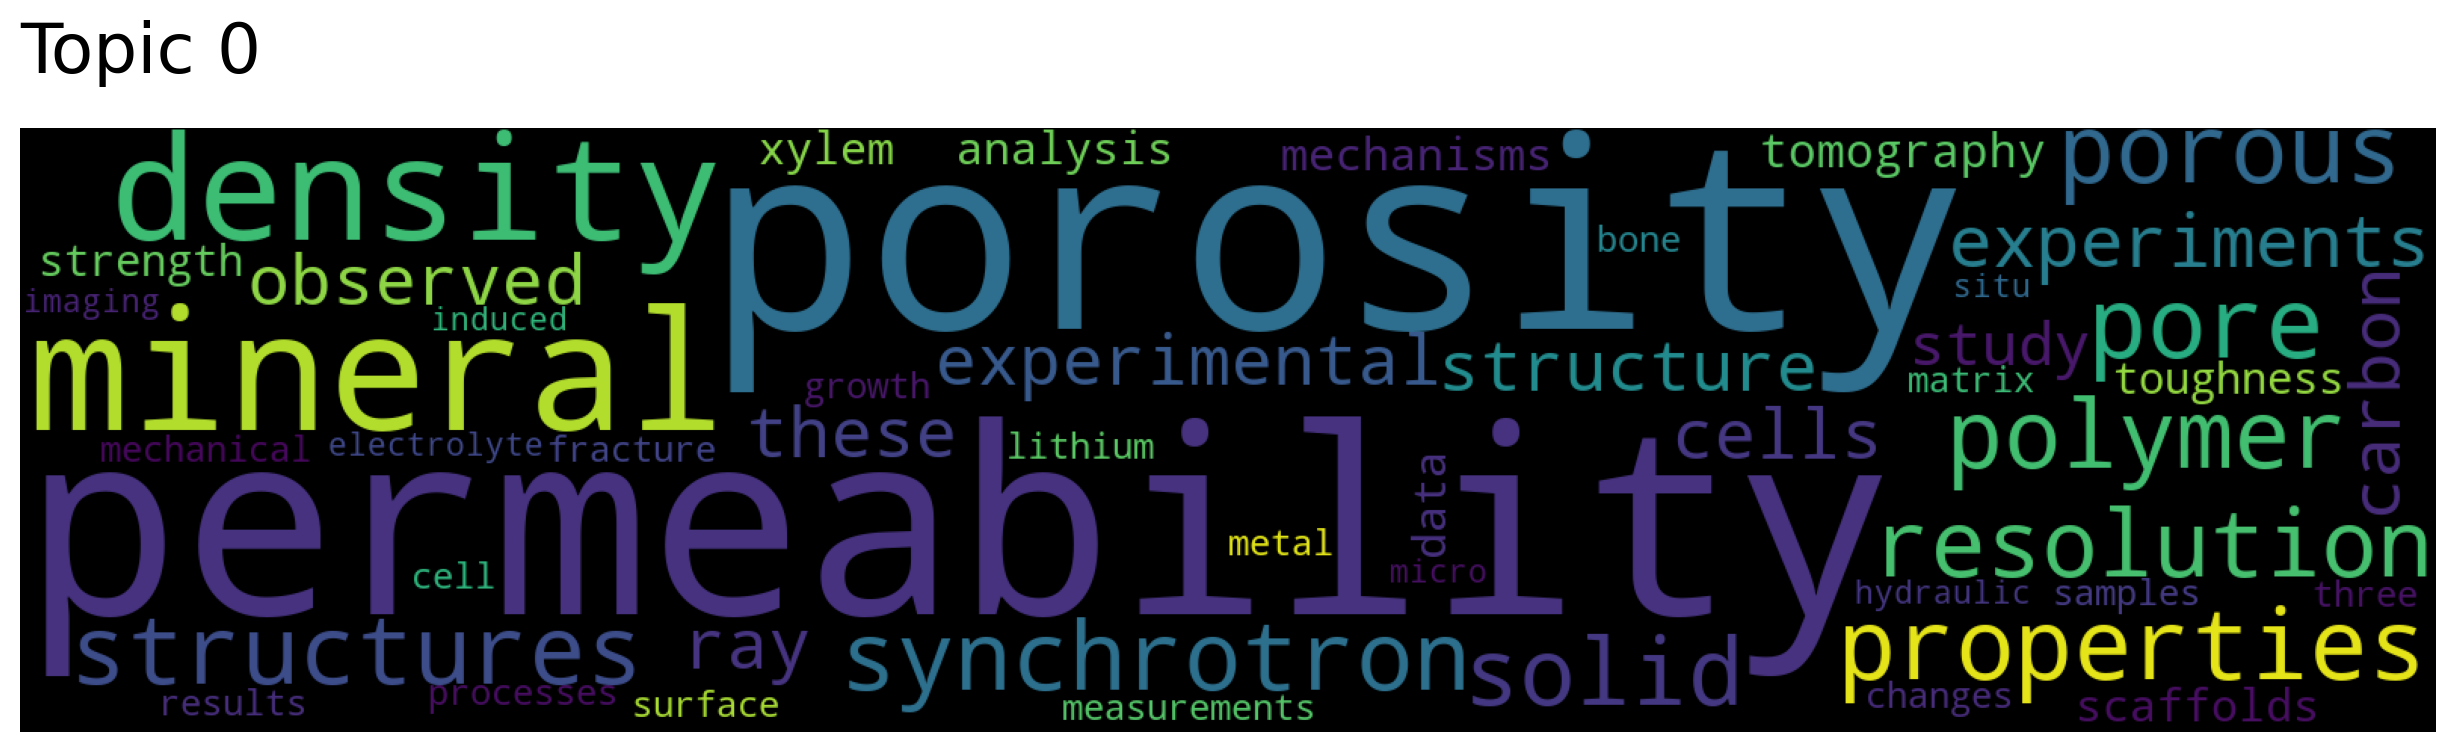

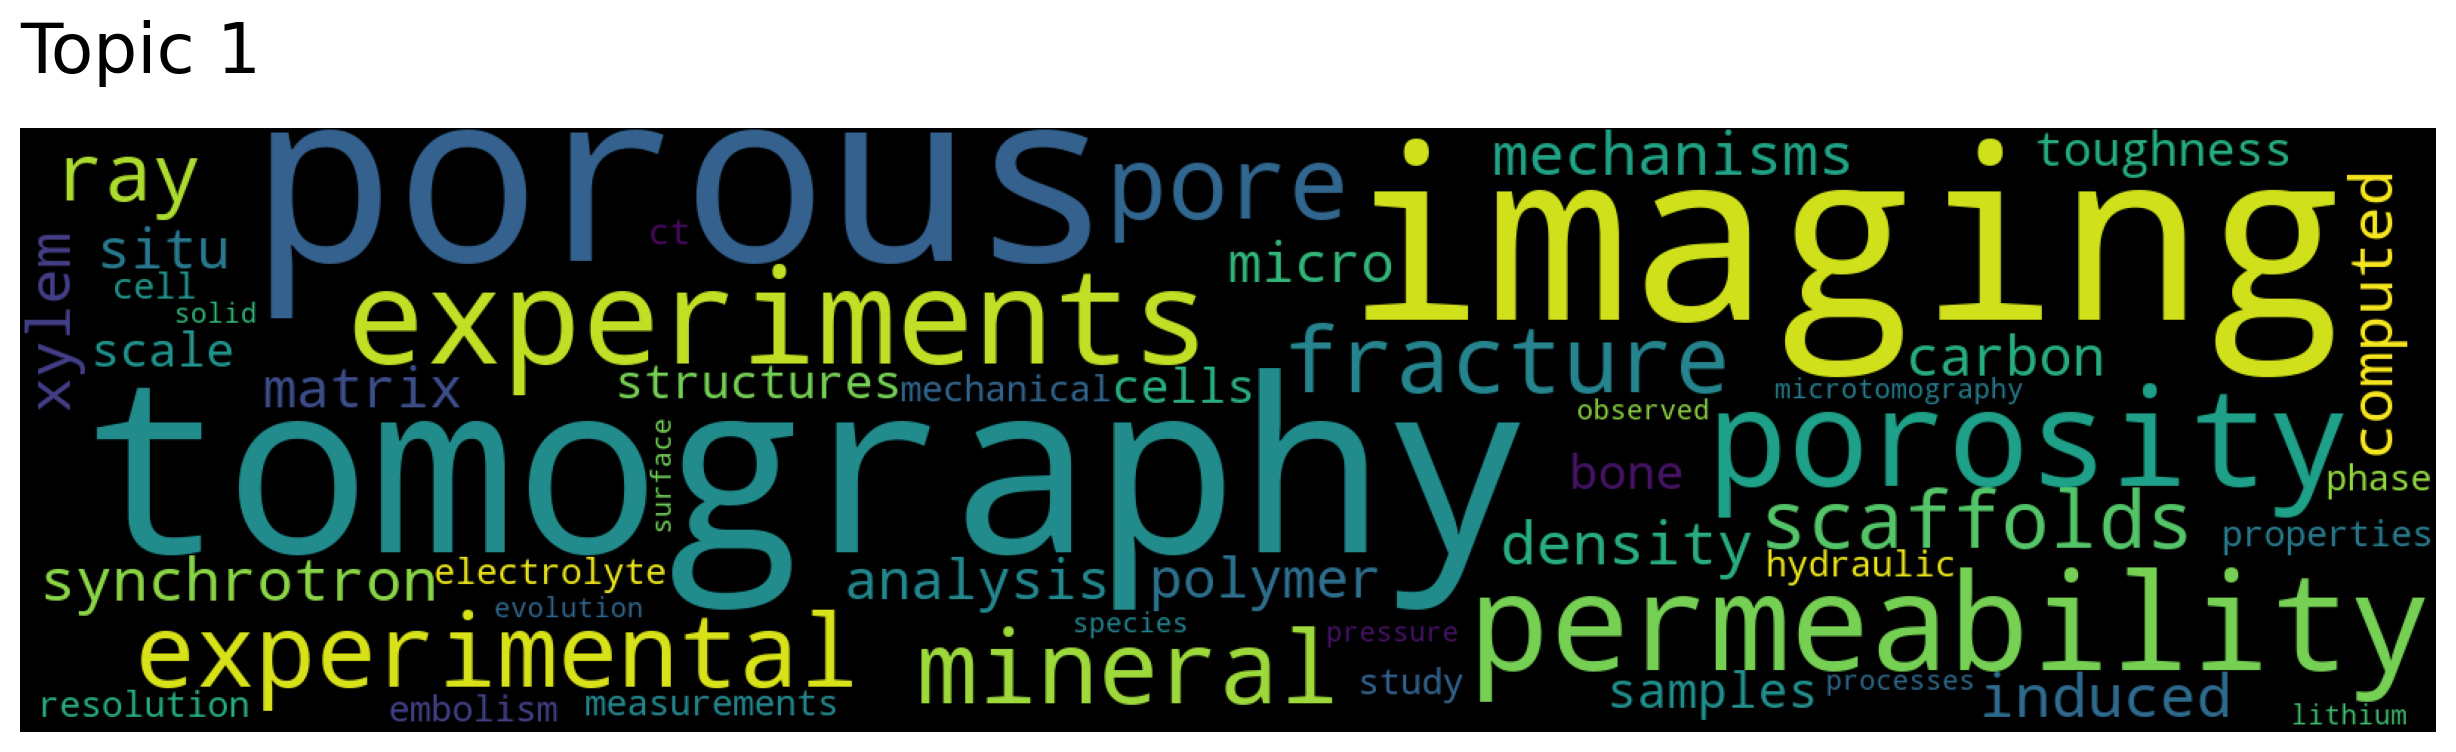

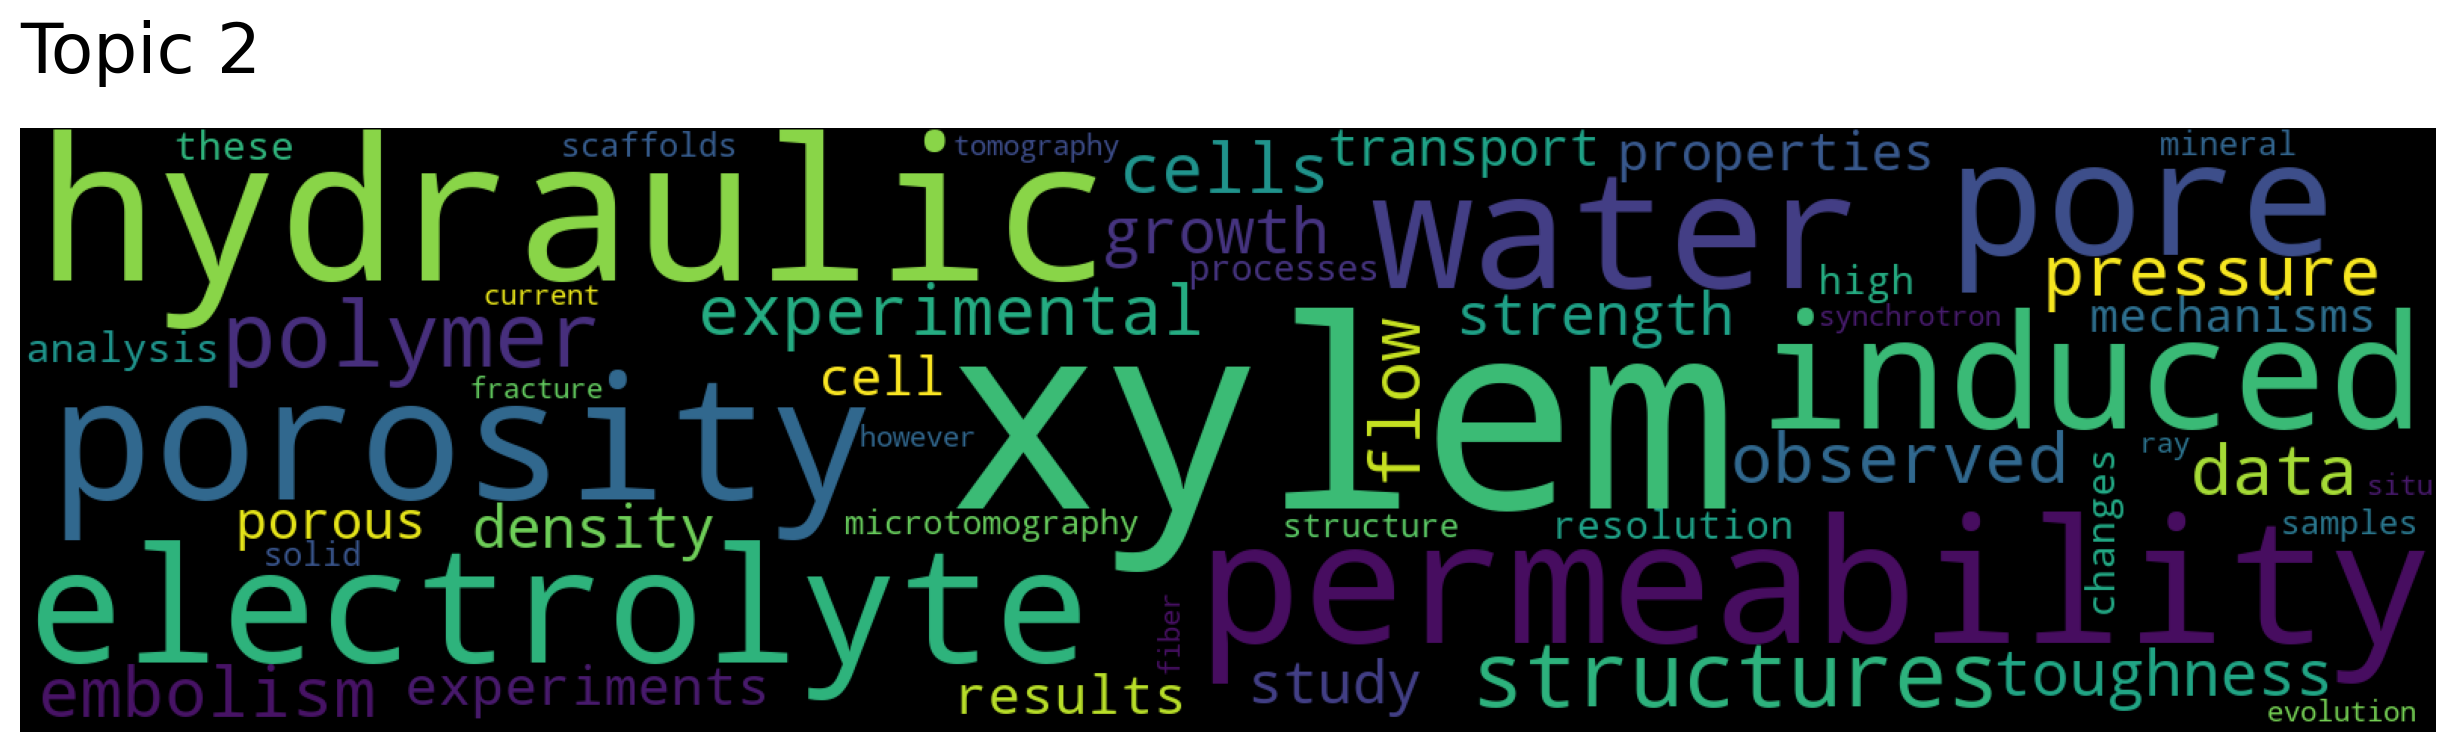

In [16]:
topic_words, word_scores, topic_nums = model_stop_removed.get_topics(model_stop_removed.get_num_topics())
for topic in topic_nums[:7]:
    model_stop_removed.generate_topic_wordcloud(topic)

In [17]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_stop_removed.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.7089889049530029
-----------
Pore-scale multiphase flow modeling imaging CO [ d2 ] exsolution Sandstone
-----------

Document: 30, Score: 0.6894096732139587
-----------
Probing Dynamics Biomineralization Pore Scale Using X-ray Computed Tomography
-----------

Document: 325, Score: 0.6647235155105591
-----------
X-Ray Computed Tomography Microstructure Evolution Polymer Impregnation Pyrolysis Processing Ceramic Matrix Composites
-----------

Document: 238, Score: 0.6600354909896851
-----------
X-ray Phase Imaging Computed Tomography Sandpaper Analyzer
-----------

Document: 370, Score: 0.6580941677093506
-----------
Pore-scale topology analysis flame stabilization inside inert porous media using X-ray microtomography
-----------



In [18]:
words, word_scores = model_stop_removed.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621777649944
embolism 0.4667333925464471
ct 0.4369721093403249
synchrotron 0.41696935944293373
microtomography 0.4099750433294113
induced 0.4070120909003778
scaffolds 0.3840783589033091
matrix 0.3689087712141358
cells 0.3666332967044179
mineral 0.35812424812444954
fracture 0.3579554173039311
analysis 0.34740616936226365
mechanical 0.34325065993465137
porous 0.330531238530303
bone 0.33018809454110803
permeability 0.32532448405720227
electrolyte 0.31890531565539804
experiments 0.31382637256671875
cell 0.3038608115222295
micro 0.30229137231336367


### BERTopic

In [19]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 3.8 MB 43.7 MB/s 
     |████████████████████████████████| 1.2 MB 41.0 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 49.4 MB/s 
     |████████████████████████████████| 6.5 MB 30.8 MB/s 
     |████████████████████████████████| 636 kB 49.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=273ea84dc147f0a9e787f51d37929ec1962e1951b1b1e9f18f032dd637a10a35
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from bertopic import BERTopic

In [29]:
topic_model_stop = BERTopic()
topics, probs = topic_model_stop.fit_transform(new_df)

In [30]:
topic_model_stop.get_topic_info()

Topic  Count                                          Name
0       0     82             0_xray_synchrotron_the_tomography
1      -1     63                    -1_ash_the_xray_conversion
2       1     55                      1_inf_pore_area_reactive
3       2     46                   2_xylem_embolism_vessel_inf
4       3     42          3_bone_properties_fracture_toughness
5       4     36               4_pumice_magma_eruption_bubbles
6       5     28  5_lithium_batteries_electrolyte_electrolytes
7       6     27               6_transport_water_layers_porous
8       7     22         7_data_algorithms_parallel_facilities
9       8     16          8_species_cheliceral_spiders_muscles
10      9     12              9_scaffolds_glass_bone_bioactive
11     10     11       10_soil_mucilage_compaction_rhizosphere

In [31]:
topic_model_stop.visualize_topics()


In [32]:
topic_model_stop.visualize_barchart()

In [26]:
topic_model_stop.visualize_heatmap()

In [33]:
# update with lemmatization

import nltk
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer

>>> from nltk import word_tokenize          
>>> from nltk.stem import WordNetLemmatizer 
>>> class LemmaTokenizer:
...     def __init__(self):
...         self.wnl = WordNetLemmatizer()
...     def __call__(self, doc):
...         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
# vectorizer_model = CountVectorizer(stop_words="English", ngram_range=(1, 5))
topic_model_stop.update_topics(new_df, topics, vectorizer_model=tf_vectorizer)



In [34]:
topic_model_stop.visualize_barchart()

### Using SciBERT

In [27]:
!pip install flair

     |████████████████████████████████| 322 kB 3.9 MB/s 
     |████████████████████████████████| 788 kB 6.4 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 1.2 MB 48.4 MB/s 
     |████████████████████████████████| 981 kB 39.9 MB/s 
     |████████████████████████████████| 19.7 MB 474 kB/s 
     |████████████████████████████████| 48 kB 5.4 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=1a05d041e7579ccee58dd3f35bc1e7ea3fe245332fef8c74a3402da97397538a
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=5beb10c920380ec4e8c6c3e91

In [36]:
from flair.embeddings import TransformerDocumentEmbeddings

scibert_emb = TransformerDocumentEmbeddings('allenai/scibert_scivocab_uncased')
topic_model_scibert = BERTopic(embedding_model=scibert_emb)

2022-04-01 19:49:13,599 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


In [37]:
import time
start_time = time.time()
# topic_model_scibert = BERTopic()
topics_scibert, probs_scibert = topic_model_scibert.fit_transform(new_df)
print('Total time taken (mins): ', int((time.time()-start_time)/60))


Total time taken (mins):  0


In [38]:
topic_model_scibert.get_topic_info()

Topic  Count                          Name
0      0    245            0_the_ray_bone_inf
1      1    195  1_tomography_ray_micro_using

In [39]:
topic_model_scibert.visualize_topics()

ValueError: ignored

In [40]:
topic_model_scibert.visualize_barchart()

### only on battery Domain

In [45]:
df.columns

Index(['DOI', 'Title', 'Journal', 'Authors', 'Pub Year', 'Beamlines',
       'Funding Source', 'Research Area', 'Pub TYpe', 'Citation Count',
       'Abstract', 'Unnamed: 11', 'Combined'],
      dtype='object')

In [46]:
df['Title']

0      Insights from in-situ x-ray computed tomograph...
1      Effect of aging on the toughness of human cort...
2      Age related transparent Root Dentin: Mineral C...
3                                                       
4      TGF-beta regulates the mechanical properties a...
                             ...                        
435    Toughening mechanisms of the elytra of the dia...
436    Supercomputing 20 - Best Presentation Award: I...
437    Scalable method for micro-CT analysis enables ...
438    Scaleup and manufacturability of symmetric-str...
439    Natural selection maintains species despite fr...
Name: Title, Length: 440, dtype: object

In [13]:
import re
bat_art = []
for art in new_df:
  if (re.search("battery | batteries | lithium",art)):
    bat_art.append(art)

In [14]:
bat_art

['Detection subsurface structures underneath dendrites formed cycled lithium metal electrodes Failure caused dendrite growth high-energy-density , rechargeable batteries lithium metal anodes prevented widespread use applications ranging consumer electronics electric vehicles . Efforts solve lithium dendrite problem focused preventing growth protrusions anode surface . Synchrotron hard X-ray microtomography experiments symmetric lithium-polymer-lithium cells cycled 90 °C show early stage dendrite development , bulk dendritic structure lies within electrode , underneath polymer/electrode interface . Furthermore , observed crystalline impurities , present uncycled lithium anodes , base subsurface dendritic structures . The portion dendrite protruding electrolyte increases cycling spans electrolyte thickness , causing short circuit . Contrary conventional wisdom , seems preventing dendrite formation polymer electrolytes depends inhibiting formation subsurface structures lithium electrode .

In [58]:
len(bat_art)

20

In [15]:

# scibert_emb = TransformerDocumentEmbeddings('allenai/scibert_scivocab_uncased')
topic_model_bat = BERTopic()

import time
start_time = time.time()
topics_bat, probs_bat = topic_model_bat.fit_transform(bat_art)
print('Total time taken (mins): ', int((time.time()-start_time)/60))


Total time taken (mins):  0


In [16]:
topic_model_bat.get_topic_info()

Topic  Count                                  Name
0     -1     20  -1_lithium_batteries_electrolyte_the

### on SPECTER

In [19]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('allenai-specter')
topic_model_specter = BERTopic(embedding_model=sentence_model)



Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.71k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/622 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/462k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/331 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/222k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
import time
start_time = time.time()
# topic_model_scibert = BERTopic()
topics_specter, probs_specter = topic_model_specter.fit_transform(new_df)
print('Total time taken (mins): ', int((time.time()-start_time)/60))

Total time taken (mins):  0


In [21]:
topic_model_specter.get_topic_info()

Topic  Count                                      Name
0      -1     95                 -1_ray_ash_the_tomography
1       0     90               0_pore_the_permeability_inf
2       1     51     1_data_advanced_tomography_algorithms
3       2     43           2_bone_fracture_crack_toughness
4       3     39               3_xylem_vessel_embolism_inf
5       4     30                4_fiber_matrix_textile_ray
6       5     24  5_lithium_batteries_electrolyte_dendrite
7       6     23           6_transport_water_fuel_catalyst
8       7     17        7_species_cheliceral_spiders_power
9       8     15            8_soil_mucilage_compaction_eps
10      9     13          9_scaffolds_glass_mechanical_the

In [22]:
topic_model_specter.visualize_barchart()

In [23]:
topic_model_specter.get_topic(5)[:10]

[('lithium', 0.12900484734664291),
 ('batteries', 0.0608733576354107),
 ('electrolyte', 0.058649537257453574),
 ('dendrite', 0.046022270810323986),
 ('solid', 0.04586125601251216),
 ('electrolytes', 0.04465587257274766),
 ('metal', 0.04326168089776281),
 ('density', 0.041482513346722594),
 ('electrode', 0.037068292545800414),
 ('li', 0.03169067909690047)]

In [26]:
# update using lemmatization

tf_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
# vectorizer_model = CountVectorizer(stop_words="English", ngram_range=(1, 5))
topic_model_specter.update_topics(new_df, topics_specter, vectorizer_model=tf_vectorizer)

In [27]:
topic_model_specter.visualize_barchart()

In [28]:
topic_model_specter.get_topic(5)[:10]

[('lithium', 0.09705445998551913),
 ('electrolyte', 0.0764427088366399),
 ('battery', 0.06962101520293809),
 ('.', 0.05748907716152669),
 ('dendrite', 0.046903059879653784),
 ('electrode', 0.044602984464679585),
 (',', 0.04407327385277344),
 ('anode', 0.03982951242337251),
 ('density', 0.03977185589542496),
 ('metal', 0.03649170602194629)]

### using spacy

In [42]:
pip install bertopic[spacy]

In [43]:
!pip install spacy

In [44]:
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 460.2 MB 34 kB/s 
     |████████████████████████████████| 51 kB 119 kB/s 
     |████████████████████████████████| 1.1 MB 6.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [46]:
!pip install spacy-transformers

In [47]:
import spacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_trf", exclude=['tagger', 'parser', 'ner', 
                                             'attribute_ruler', 'lemmatizer'])

topic_model_spacy = BERTopic(embedding_model=nlp)

ValueError: ignored